# Regression stands for to model a target value based on independent variables and Linear Regression is used to find the relationship between dependent (y) and independent variable (x)


---


*   Linear Regression is a supervised machine learning algorithm

*   Always works with continuous value

*   formula y=mx+c m=slope of line and c=intercept

*   Main target for linear regression to find the best value for x and y




In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
%matplotlib inline




# There are 33 columns:

* school: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

* sex: student's sex (binary: 'F' - female or 'M' - male)

* age: student's age (numeric: from 15 to 22)

* address: student's home address type (binary: 'U' - urban or 'R' - rural)

* famsize: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

* Pstatus: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

* Medu: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

* Fedu: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

* Mjob: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

* Fjob: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

* reason: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

* guardian: student's guardian (nominal: 'mother', 'father' or 'other')

* traveltime: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

* studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

* failures: number of past class failures (numeric: n if 1<=n<3, else 4)

* schoolsup: extra educational support (binary: yes or no)

* famsup: family educational support (binary: yes or no)

* paid: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

* activities: extra-curricular activities (binary: yes or no)

* nursery: attended nursery school (binary: yes or no)

* higher: wants to take higher education (binary: yes or no)

* internet: Internet access at home (binary: yes or no)

* romantic: with a romantic relationship (binary: yes or no)

* famrel: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

* freetime: free time after school (numeric: from 1 - very low to 5 - very high)

* goout: going out with friends (numeric: from 1 - very low to 5 - very high)

* Dalc: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

* Walc: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

* health: current health status (numeric: from 1 - very bad to 5 - very good)

* absences: number of school absences (numeric: from 0 to 93)

* G1: first period grade (numeric: from 0 to 20)

* G2: second period grade (numeric: from 0 to 20)

* G3: final grade (numeric: from 0 to 20)


In [31]:
data=pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv")

In [32]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [33]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [34]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [35]:
data.shape

(395, 33)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [37]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [38]:
# cor_matrix=data.corr()

In [39]:
# cor_matrix.style.background_gradient(cmap="Oranges_r")

In [40]:
# plt.figure(figsize=(15,15))
# sns.heatmap(cor_matrix, annot = True,cmap="Purples")
# plt.show()

In [41]:
data["G3"].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

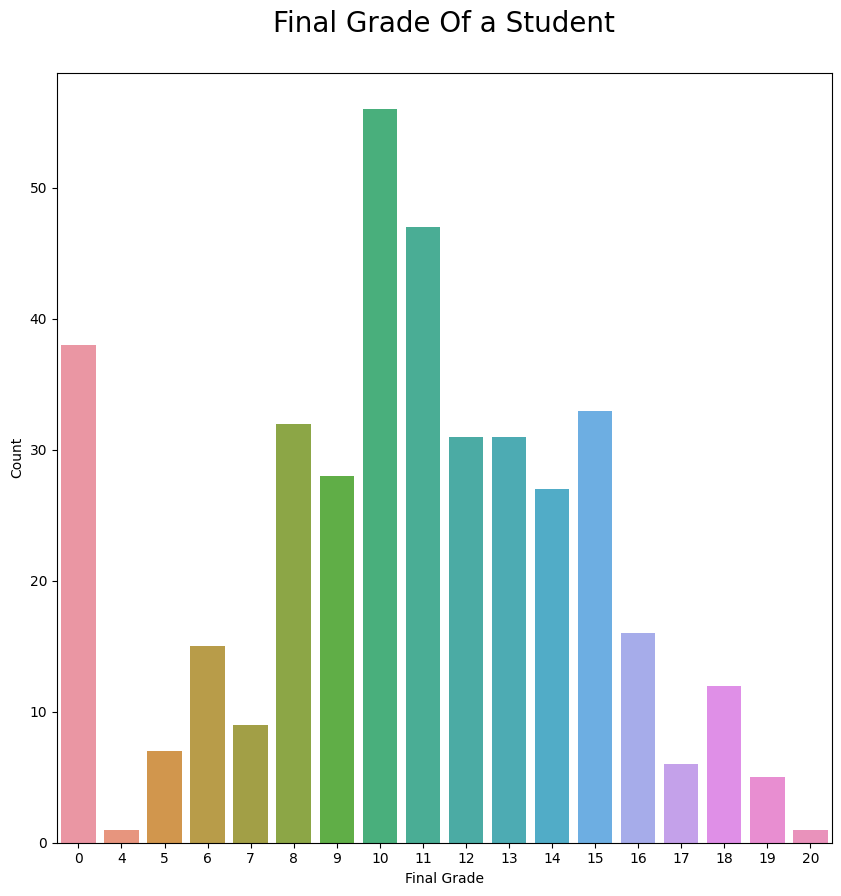

In [42]:
plt.figure(figsize=(10,10))
b=sns.countplot(x=data["G3"])
b.axes.set_title("Final Grade Of a Student\n",fontsize=20)
b.set_xlabel("Final Grade")
b.set_ylabel("Count")
plt.show()

In [43]:
male_student=len(data[data["sex"]=="M"])
female_student=len(data[data["sex"]=="F"])

In [44]:
print(f"Number of Male Students   {male_student}")

Number of Male Students   187


In [45]:
print(f"Number of Female  Students   {female_student}")

Number of Female  Students   208


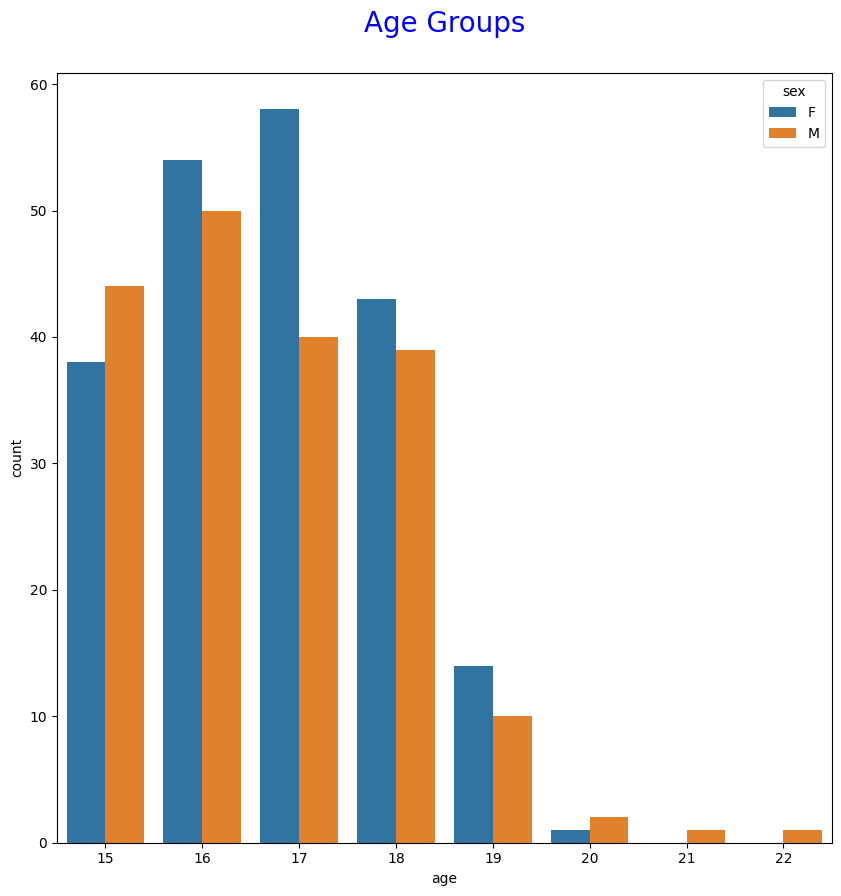

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(x="age",hue="sex",data=data)
plt.title("Age Groups\n",fontsize=20,color="blue")
plt.show()

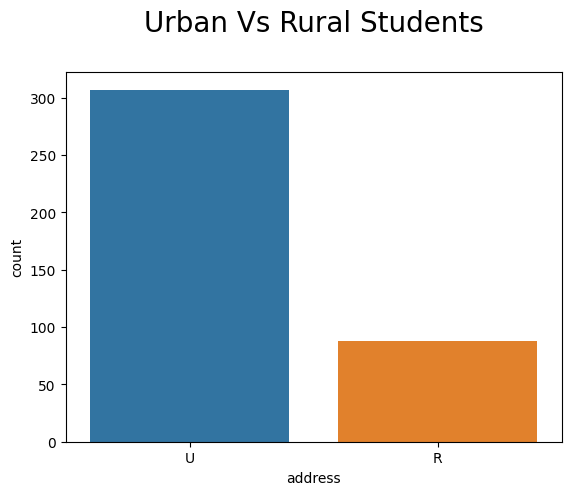

In [47]:
sns.countplot(x=data["address"])
plt.title("Urban Vs Rural Students\n",fontsize=20)
plt.show()

In [48]:
# data.corr()['G3'].sort_values()

In [49]:
data['GradeAvg'] = (data['G1'] + data['G2'] + data['G3']) / 3

In [50]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


In [51]:
data.drop(["school","age"], axis=1, inplace=True)

In [52]:
data.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'GradeAvg'],
      dtype='object')

In [53]:
data.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,F,U,GT3,A,4,4,at_home,teacher,course,mother,...,3,4,1,1,3,6,5,6,6,5.666667
1,F,U,GT3,T,1,1,at_home,other,course,father,...,3,3,1,1,3,4,5,5,6,5.333333
2,F,U,LE3,T,1,1,at_home,other,other,mother,...,3,2,2,3,3,10,7,8,10,8.333333
3,F,U,GT3,T,4,2,health,services,home,mother,...,2,2,1,1,5,2,15,14,15,14.666667
4,F,U,GT3,T,3,3,other,other,home,father,...,3,2,1,2,5,4,6,10,10,8.666667


In [54]:
data_dum=data

In [55]:
#Converting to categorical value
categorical_d = {'yes': 1, 'no': 0}
data_dum['schoolsup'] = data_dum['schoolsup'].map(categorical_d)
data_dum['famsup'] = data_dum['famsup'].map(categorical_d)
data_dum['paid'] = data_dum['paid'].map(categorical_d)
data_dum['activities'] = data_dum['activities'].map(categorical_d)
data_dum['nursery'] = data_dum['nursery'].map(categorical_d)
data_dum['higher'] = data_dum['higher'].map(categorical_d)
data_dum['internet'] = data_dum['internet'].map(categorical_d)
data_dum['romantic'] = data_dum['romantic'].map(categorical_d)

In [56]:
categorical_d = {'F': 1, 'M': 0}
data_dum['sex'] = data_dum['sex'].map(categorical_d)

# map the address data
categorical_d = {'U': 1, 'R': 0}
data_dum['address'] = data_dum['address'].map(categorical_d)

# map the famili size data
categorical_d = {'LE3': 1, 'GT3': 0}
data_dum['famsize'] = data_dum['famsize'].map(categorical_d)

# map the parent's status
categorical_d= {'T': 1, 'A': 0}
data_dum['Pstatus'] = data_dum['Pstatus'].map(categorical_d)

# map the parent's job
categorical_d = {'teacher': 0, 'health': 1, 'services': 2,'at_home': 3,'other': 4}
data_dum['Mjob'] = data_dum['Mjob'].map(categorical_d)
data_dum['Fjob'] = data_dum['Fjob'].map(categorical_d)

# map the reason data
categorical_d= {'home': 0, 'reputation': 1, 'course': 2,'other': 3}
data_dum['reason'] = data_dum['reason'].map(categorical_d)

# map the guardian data
categorical_d = {'mother': 0, 'father': 1, 'other': 2}
data_dum['guardian'] = data_dum['guardian'].map(categorical_d)


In [57]:
data_dum.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'GradeAvg'],
      dtype='object')

In [58]:
len(data_dum.columns)

32

In [59]:
data_dum['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [60]:
data_dum.head(5)

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,1,1,0,0,4,4,3,0,2,0,...,3,4,1,1,3,6,5,6,6,5.666667
1,1,1,0,1,1,1,3,4,2,1,...,3,3,1,1,3,4,5,5,6,5.333333
2,1,1,1,1,1,1,3,4,3,0,...,3,2,2,3,3,10,7,8,10,8.333333
3,1,1,0,1,4,2,1,2,0,0,...,2,2,1,1,5,2,15,14,15,14.666667
4,1,1,0,1,3,3,4,4,0,1,...,3,2,1,2,5,4,6,10,10,8.666667


In [61]:
train_data=data_dum.drop("G3",axis=1)
label_data=data_dum['G3']

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data,label_data, test_size = 0.8, random_state=42)

In [63]:
model=LinearRegression()

In [64]:
model.fit(X_train,Y_train)

LinearRegression()

In [65]:
pred=model.predict(X_test)

In [66]:
pred

array([1.00000000e+01, 1.20000000e+01, 5.00000000e+00, 1.00000000e+01,
       9.00000000e+00, 1.30000000e+01, 1.80000000e+01, 6.00000000e+00,
       2.66453526e-14, 1.40000000e+01, 1.50000000e+01, 7.00000000e+00,
       1.50000000e+01, 1.00000000e+01, 1.40000000e+01, 8.00000000e+00,
       8.00000000e+00, 1.10000000e+01, 1.50000000e+01, 8.88178420e-15,
       1.40000000e+01, 1.60000000e+01, 1.60000000e+01, 6.00000000e+00,
       2.30926389e-14, 1.90000000e+01, 1.10000000e+01, 1.20000000e+01,
       1.70000000e+01, 1.00000000e+01, 8.00000000e+00, 1.00000000e+01,
       1.50000000e+01, 1.30000000e+01, 8.00000000e+00, 5.00000000e+00,
       4.52970994e-14, 1.50000000e+01, 1.40000000e+01, 8.00000000e+00,
       5.00000000e+00, 1.10000000e+01, 1.40000000e+01, 9.00000000e+00,
       1.50000000e+01, 1.00000000e+01, 1.10000000e+01, 1.30000000e+01,
       1.30000000e+01, 1.60000000e+01, 1.30000000e+01, 1.50000000e+01,
       1.20000000e+01, 1.00000000e+01, 6.00000000e+00, 1.20000000e+01,
      

# Model Test Score

In [67]:
model.score(X_test,Y_test)

1.0

# Model Training Score

In [68]:
model.score(X_train,Y_train)

1.0

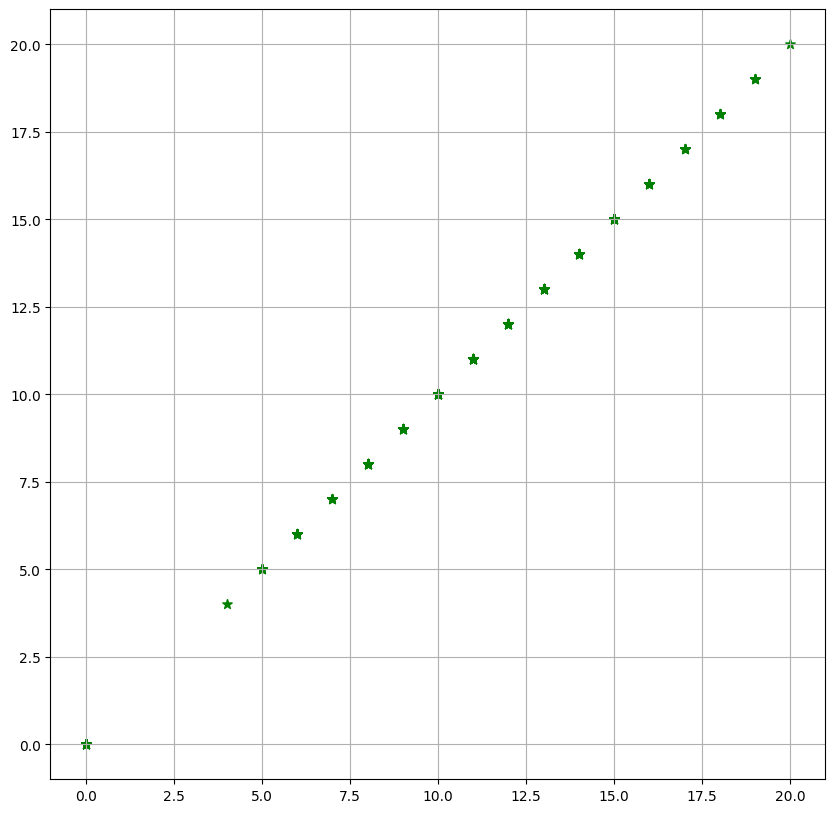

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(pred,Y_test,marker="*",s=50,color="green")
plt.grid(True)
plt.show()

# residual data

In [70]:
residual_data=Y_test-pred

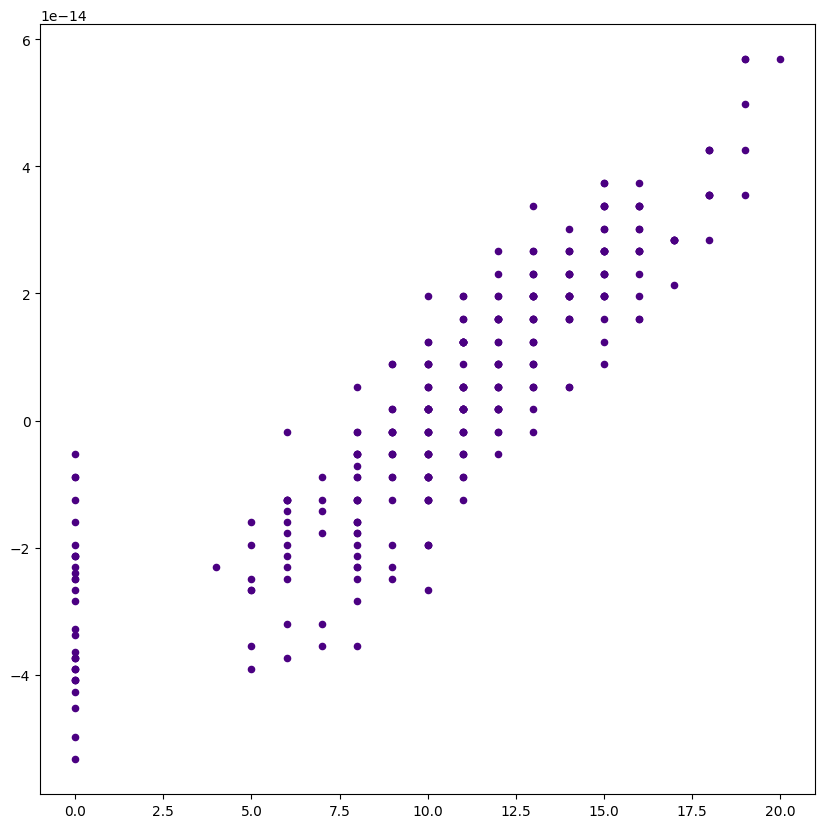

In [71]:
plt.figure(figsize=(10,10))
plt.scatter(pred,residual_data,marker=".",s=80,color="indigo")

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


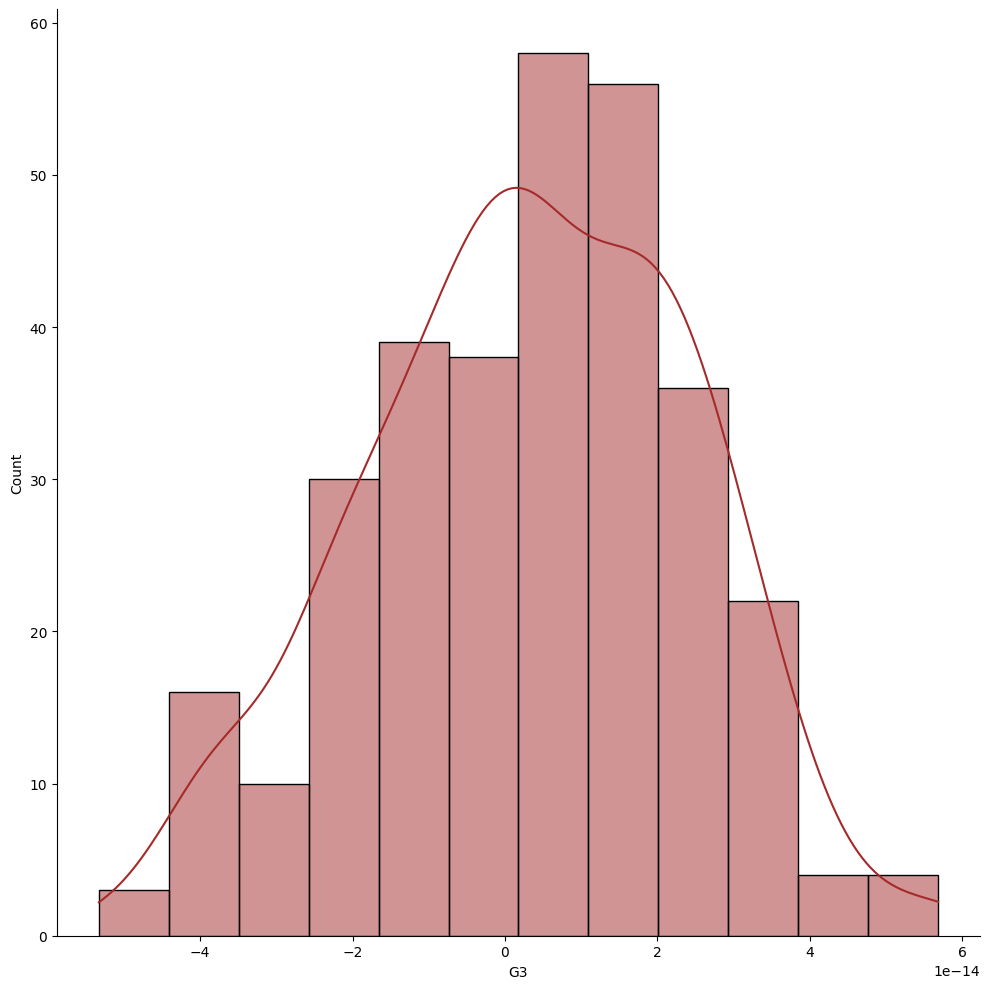

In [72]:
sns.displot(residual_data,kde=True,height=10,color="brown")
plt.show()

# R2 Score

In [73]:
r2_score(Y_test,pred)

1.0

# Mean Square Error

In [74]:
mean_squared_error(Y_test,pred)

4.61044263986827e-28